In [17]:
import mne
import os
from typing import Optional, cast, Union
import numpy as np
from numpy import ndarray
from scipy.stats import pearsonr

def concat_dataset(subjects, num_blocks):
    raws = []
    # base_path = "E:\Thesis\HybridSpeller\\record"
    base_path = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record"

    for subject in subjects:
        for i in range(0,num_blocks):
            print(subject)
            path = os.path.join(base_path, subject, f"{subject}{i}.fif")
            print("Here is the path")
            print(path)
            raws.append(mne.io.read_raw_fif(path, preload = True))
    raw = mne.concatenate_raws(raws)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    print(raw.info['ch_names'])
    print(raw.info['sfreq'])
    return raw

sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif...
    Range : 0 ... 14570 =      0.000 ...    58.280 secs
Ready.
Reading 0 ... 14570  =      0.000 ...    58.280 secs...
sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303191.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303191.fif...
    Range : 0 ... 13807 =      0.000 ...    55.228 secs
Ready.
Reading 0 ... 13807  =      0.000 ...    55.228 secs...
sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303192.fif
Opening raw data file C

C:\Users\bci\AppData\Local\Temp\ipykernel_13420\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path, preload = True))
C:\Users\bci\AppData\Local\Temp\ipykernel_13420\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303191.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path, preload = True))


Event IDs: [ 1  2  3 10 11 12 19 20 21]
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 1.024 (s)


c:\Users\bci\.virtualenvs\hybrid-ssvep-p300-speller-ZL_XZSnA\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


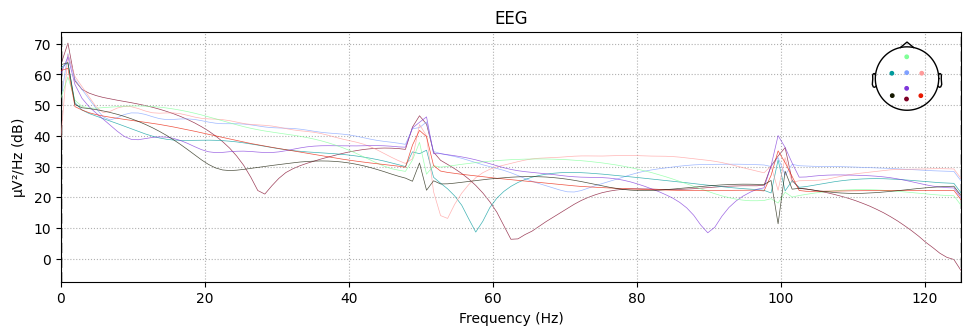

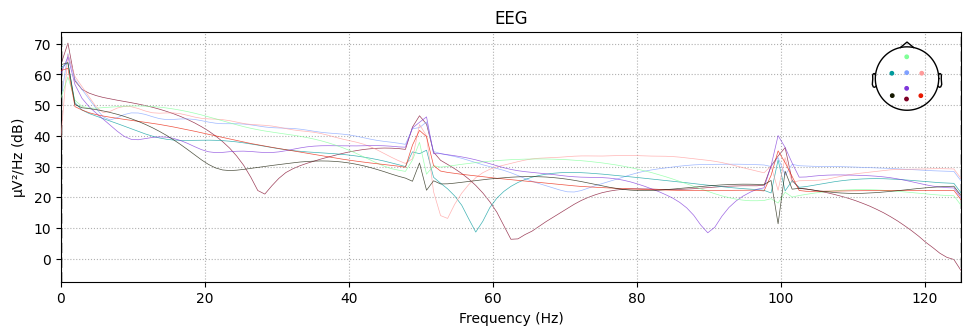

In [2]:
from scipy.signal import hilbert

subjects = ['sunsun_20230319']
raw = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
# new_data = raw.get_data()[:,10*250:-10*250]
# raw = mne.io.RawArray(new_data, raw.info)
raw.notch_filter([50,100])
events = mne.find_events(raw)
epochs = mne.Epochs(raw=raw,events=events, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)
raw.compute_psd().plot()

sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif...
    Range : 0 ... 14570 =      0.000 ...    58.280 secs
Ready.
Reading 0 ... 14570  =      0.000 ...    58.280 secs...
sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif...
    Range : 0 ... 13810 =      0.000 ...    55.240 secs
Ready.
Reading 0 ... 13810  =      0.000 ...    55.240 secs...
sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsu

C:\Users\bci\AppData\Local\Temp\ipykernel_13420\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(path, preload = True))
C:\Users\bci\AppData\Local\Temp\ipykernel_13420\4282770256.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(pat

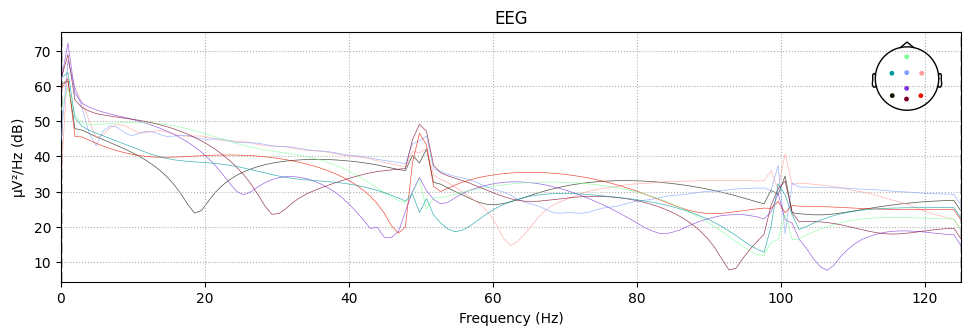

In [3]:
from scipy.signal import hilbert

subjects = ['sunsun_20230319_test']
raw_test = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
# new_test_data = raw.get_data()[:,10*250:-10*250]
# raw_test = mne.io.RawArray(new_test_data, raw.info)
raw_test.notch_filter([50,100])
events_test = mne.find_events(raw_test)
epochs_test = mne.Epochs(raw=raw_test,events=events_test, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)
raw_test.compute_psd().plot()

In [12]:
X_train = epochs.get_data()[:,:-1,:-1]
print(X_train.shape)
dropped_epochs = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
print(dropped_epochs)

Using data from preloaded Raw for 45 events and 926 original time points ...
0 bad epochs dropped
(45, 8, 925)
[]


In [13]:
y_train = events[:,-1]

In [9]:


def cca_reference(list_freqs, fs, num_smpls, phases: Optional[Union[ndarray, int, float]] = None, num_harms=3):
    num_freqs = len(list_freqs)
    tidx = np.arange(1, num_smpls + 1) / fs  # time index

    y_ref = np.zeros((num_freqs, 2 * num_harms, num_smpls))
    for freq_i in range(num_freqs):
        tmp = []
        for harm_i in range(1, num_harms + 1):
            stim_freq = list_freqs[freq_i]  # in HZ
            stim_phase = phases[freq_i]
            # Sin and Cos
            tmp.extend([np.sin(2 * np.pi *  tidx * harm_i * stim_freq + (np.pi * stim_phase)),
                        np.cos(2 * np.pi * tidx * harm_i * stim_freq + (np.pi * stim_phase))])
        y_ref[freq_i] = tmp  # 2*num_harms because include both sin and cos

    return y_ref

In [10]:
from sklearn.cross_decomposition import CCA
from filterbank import filterbank
from scipy.stats import mode

def fbcca_realtime(eeg, list_freqs, list_phases, fs, num_harms=3, num_fbs=5, debug=True):
    # print("EEG shape: ", eeg.shape)

    fb_coefs = np.power(np.arange(1, num_fbs + 1), (-1.25)) + 0.25

    num_targs = len(list_freqs)
    # print("HERE IS THE EEG SHAPE", eeg.shape)
    _, num_smpls = eeg.shape  # 40 taget (means 40 fre-phase combination that we want to predict)
    y_ref = cca_reference(list_freqs, fs, num_smpls, list_phases, num_harms)
    cca = CCA(n_components=1)  # initilize CCA

    # result matrix
    r = np.zeros((num_fbs, num_targs))
    results = np.zeros(num_targs)
    r_tmp_mode = []
    r_tmp_corr_avg = []

    
    test_tmp = np.squeeze(eeg[:, :])  # deal with one event a time
    for fb_i in range(num_fbs):  # filter bank number, deal with different filter bank
        for class_i in range(num_targs):
            testdata = filterbank(test_tmp, fs, fb_i)  # data after filtering
            refdata = np.squeeze(y_ref[class_i, :, :])  # pick corresponding freq target reference signal
            test_C, ref_C = cca.fit_transform(testdata.T, refdata.T)
            # len(row) = len(observation), len(column) = variables of each observation
            # number of rows should be the same, so need transpose here
            # output is the highest correlation linear combination of two sets
            r_tmp, _ = pearsonr(np.squeeze(test_C),
                                np.squeeze(ref_C))  # return r and p_value, use np.squeeze to adapt the API
            if r_tmp == np.nan:
                r_tmp = 0
            r[fb_i, class_i] = r_tmp
    rho = np.dot(fb_coefs, r)  # weighted sum of r from all different filter banks' result
    if(debug):
        print("rho: ", rho)
    result = np.argmax(rho) # get maximum from the target as the final predict (get the index), and index indicates the maximum entry(most possible target)
    if(debug):
        print("result: ", result)
    r_tmp_mode.append(result)
    if(debug):
        print("correlation: ", abs(rho[result]))
    r_tmp_corr_avg.append(abs(rho[result]))
    r_mode = mode(r_tmp_mode)[0][0]
    r_corr_avg = np.mean(r_tmp_corr_avg)
    if(debug):
        print("====Most recurrent class: ====", r_mode)
        print("====Average correlation: =====", r_corr_avg)

    THRESHOLD = 0.3
    if r_corr_avg >= THRESHOLD:  # 2.749=np.sum(fb_coefs*0.85)
        return r_mode  # if the correlation isn't big enough, do not return any command

In [24]:
TARGET_CHARACTERS:list = ["A", "B", "C", "J", "K", "L", "S", "T", "U"]

In [36]:
def fbcca(eeg, list_freqs, list_phases, fs, num_harms=3, num_fbs=5):
    fb_coefs = np.power(np.arange(1, num_fbs + 1), (-1.25)) + 0.25

    num_targs = len(list_freqs)
    events, _, num_smpls = eeg.shape  # 40 taget (means 40 fre-phase combination that we want to predict)
    y_ref = cca_reference(list_freqs, fs, num_smpls, list_phases, num_harms)
    cca = CCA(n_components=1)  # initilize CCA

    # result matrix
    r = np.zeros((num_fbs, num_targs))
    results = np.zeros(num_targs)
    r_mode = []
    r_corr_avg = []
    output = []

    for event in range(eeg.shape[0]):
        test_tmp = np.squeeze(eeg[event, :, :])  # deal with one event a time
        for fb_i in range(num_fbs):  # filter bank number, deal with different filter bank
            for class_i in range(num_targs):
                testdata = filterbank(test_tmp, fs, fb_i)  # data after filtering
                refdata = np.squeeze(y_ref[class_i, :, :])  # pick corresponding freq target reference signal
                test_C, ref_C = cca.fit_transform(testdata.T, refdata.T)
                # len(row) = len(observation), len(column) = variables of each observation
                # number of rows should be the same, so need transpose here
                # output is the highest correlation linear combination of two sets
                r_tmp, _ = pearsonr(np.squeeze(test_C),
                                    np.squeeze(ref_C))  # return r and p_value, use np.squeeze to adapt the API
                if r_tmp == np.nan:
                    r_tmp = 0
                r[fb_i, class_i] = r_tmp
        rho = np.dot(fb_coefs, r)  # weighted sum of r from all different filter banks' result
        # print("rho: ", rho)
        result = np.argmax(rho)
        output.append(TARGET_CHARACTERS[result])
        r_mode.append(result)
        # print("correlation: ", abs(rho[result]))
        r_corr_avg.append(abs(rho[result]))
    return output
    # print("====Most recurrent class: ====", mode(r_mode)[0][0])
    # print("====Average correlation: =====", np.mean(r_corr_avg))

In [37]:
FREQS = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
PHASES = [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]
fbcca_output = fbcca(X_train, FREQS, PHASES, 250)

In [38]:
MARKERS:dict = {"A": 1.0, "B": 2.0, "C": 3.0, "D": 4.0, "E": 5.0, "F": 6.0, "G": 7.0, "H": 8.0, "I": 9.0, "J": 10.0, "K": 11.0, "L": 12.0, "M": 13.0, "N": 14.0, "O": 15.0, "P": 16.0, "Q": 17.0, "R": 18.0, "S": 19.0, "T": 20.0, "U": 21.0, "V": 22.0, "W": 23.0, "X": 24.0, "Y": 25.0, "Z": 26.0, "0": 27.0, "1": 28.0, "2": 29.0, "3": 30.0, "4": 31.0, "5": 32.0, "6": 33.0, "7": 34.0, "8": 35.0, "9": 36.0, ".": 37.0, "?": 38.0, ",": 39.0, "(": 40.0, "Space": 41.0, ")": 42.0, "!": 43.0, "-": 44.0, "<<":45.0, "trial_start":99.0}
output = []
for y in y_train:
    output.append(list(filter(lambda x: MARKERS[x] == y, MARKERS))[0])

print(fbcca_output)
print(output)

['T', 'C', 'A', 'U', 'K', 'J', 'B', 'K', 'L', 'B', 'L', 'J', 'K', 'S', 'T', 'C', 'T', 'A', 'K', 'K', 'T', 'J', 'C', 'B', 'B', 'B', 'S', 'L', 'K', 'L', 'B', 'U', 'J', 'B', 'A', 'C', 'J', 'A', 'U', 'L', 'C', 'K', 'C', 'S', 'K']
['T', 'C', 'A', 'U', 'K', 'J', 'B', 'S', 'L', 'B', 'L', 'J', 'K', 'C', 'T', 'A', 'S', 'U', 'K', 'L', 'T', 'J', 'B', 'C', 'U', 'A', 'S', 'L', 'K', 'T', 'S', 'U', 'J', 'B', 'A', 'C', 'J', 'K', 'U', 'L', 'B', 'A', 'C', 'S', 'T']
